In [1]:
import firebase_admin
from firebase_admin import firestore
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", context="talk")

# Credentials pulled from file named in GOOGLE_APPLICATION_CREDENTIALS os env var
app = firebase_admin.initialize_app()
db = firestore.client()

readings = db.collection(u'readings').order_by(u'time').stream()

In [2]:
values = [reading.to_dict() for reading in readings]

data = pd.DataFrame(values)

<IPython.core.display.Javascript object>


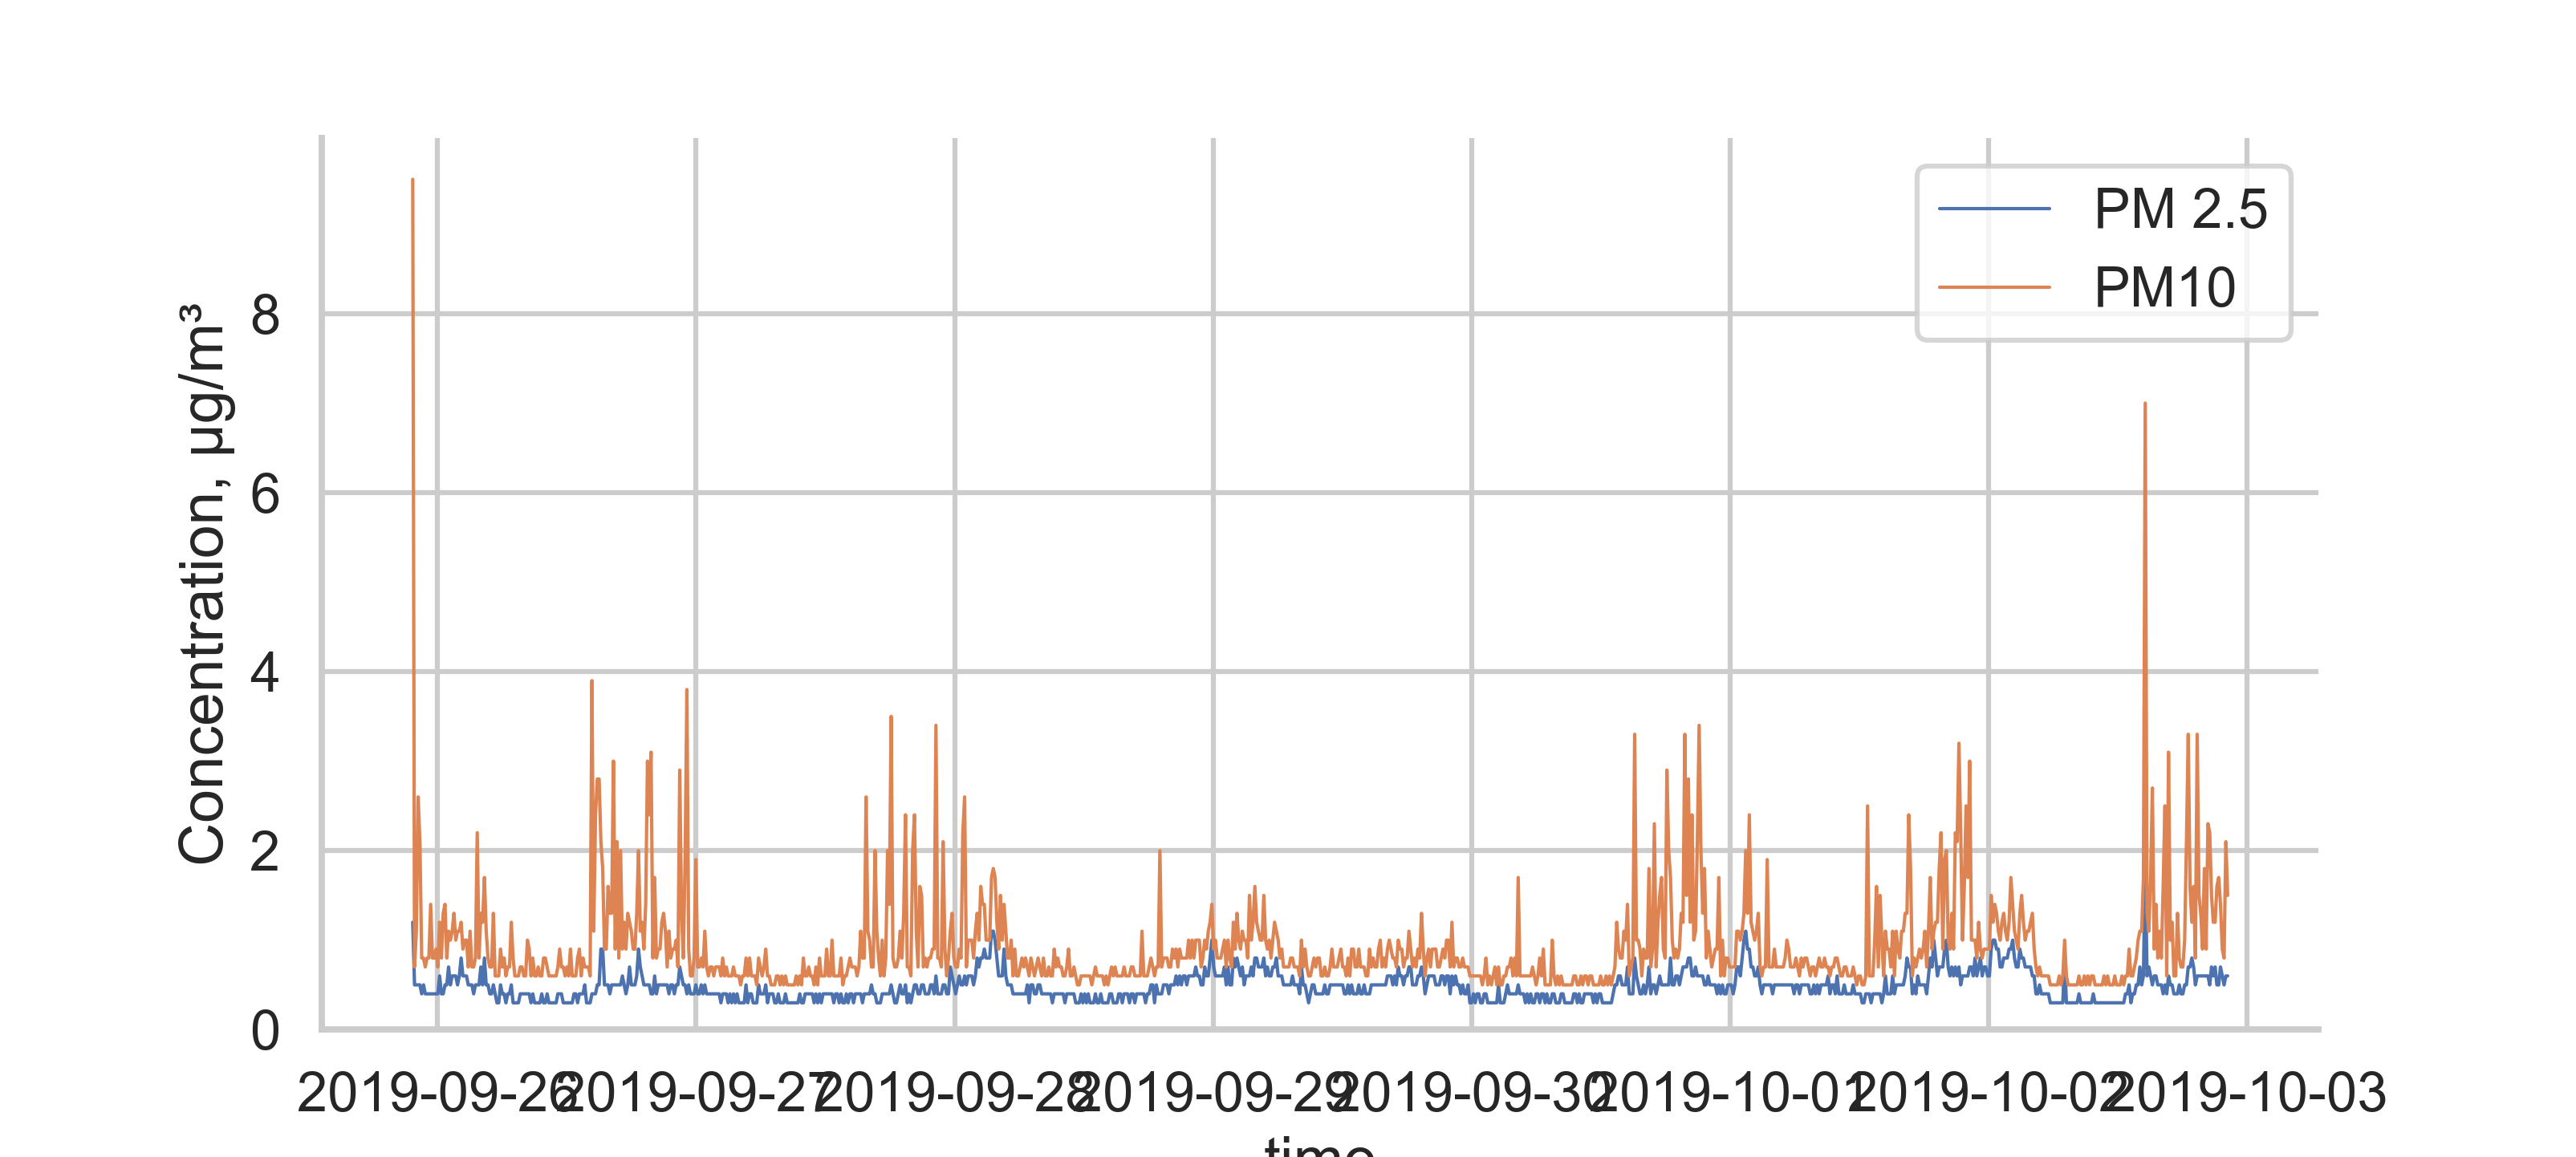

/Users/m_650704/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)
/Users/m_650704/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(0, 9.96)

In [3]:
%matplotlib notebook
sns.lineplot(x='time', y='pm2.5', data=data, linewidth=1)
sns.lineplot(x='time', y='pm10', data=data, linewidth=1)
sns.despine()
plt.legend(['PM 2.5', 'PM10'])
plt.ylabel('Concentration, μg/m³')
plt.ylim(0)